In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import nibabel
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.plotting import find_xyz_cut_coords
from glob import glob
from scipy.stats.stats import pearsonr
from nilearn.image import new_img_like
import matplotlib.pyplot as plt
from nilearn.image import mean_img
from sklearn.model_selection import ShuffleSplit

/home/parietal/hrichard/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [1]:
glob("/storage/workspace/hrichard/M2_internship/results/exp10/forrestalignment*algoProbSRM*")

NameError: name 'glob' is not defined

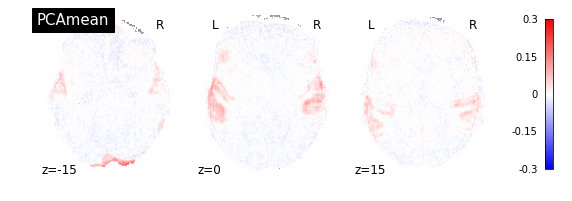

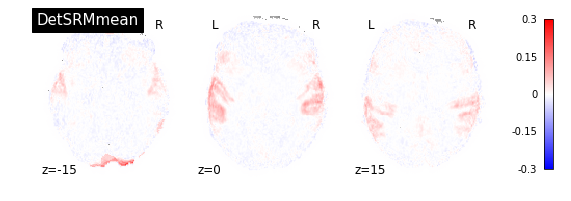

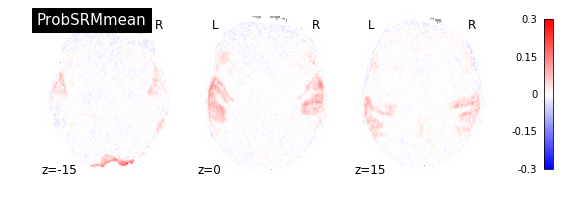

In [9]:
subjects = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# Results
res = {}
for algo in ["PCA", "DetSRM", "ProbSRM"]:
    algo_paths = glob("/storage/workspace/hrichard/M2_internship/results/exp10/" + 
                         "forrestalignment*_algo"+algo+"subject_*")
    m_img = mean_img(algo_paths)
    plotting.plot_stat_map(m_img,
            cut_coords=[-15, 0, 15],
            display_mode="z",
            draw_cross=False,
            title=algo + "mean",
            cmap="bwr",
            vmax=0.3
            )

In [10]:
# Results
res = {}
res2 = {}
for subject in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
    for algo in ["PCA", "DetSRM", "ProbSRM"]:
        algo_paths = glob("/storage/workspace/hrichard/M2_internship/results/exp10/forrestalignment*_algo"+algo+"subject_"+str(subject)+"_*")
        m_img = mean_img(algo_paths)
#        plotting.plot_stat_map(m_img,
#                cut_coords=[-15, 0, 15],
#                display_mode="z",
#                draw_cross=False,
#                vmax=0.2,
#                title=algo + "mean",
#                cmap="seismic"
#                )
        # Quantitative score
        X = m_img.get_data()
        res[algo, subject] = len(X[X>0.05])
        res2[algo, subject] = np.mean(X)

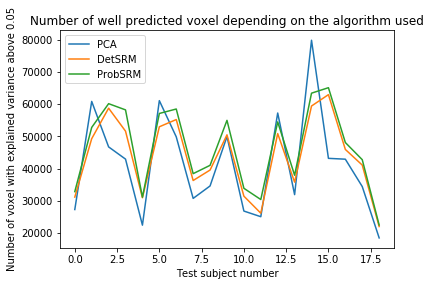

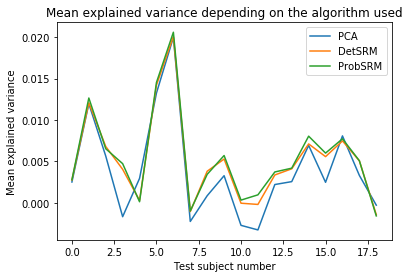

In [12]:
plt.figure()
plt.title("Number of well predicted voxel depending on the algorithm used")
for algo in ["PCA", "DetSRM", "ProbSRM"]:
    res_algo = []
    for subject in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
        res_algo.append(res[algo, subject])
    plt.plot(res_algo, label=algo)
plt.legend()
plt.ylabel("Number of voxel with explained variance above 0.05")
plt.xlabel("Test subject number")
plt.figure()
plt.title("Mean explained variance depending on the algorithm used")
for algo in ["PCA", "DetSRM", "ProbSRM"]:
    res_algo = []
    for subject in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
        res_algo.append(res2[algo, subject])
    plt.plot(res_algo, label=algo)
plt.ylabel("Mean explained variance")
plt.xlabel("Test subject number")
plt.legend()